In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from scipy.stats import norm
import time
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
data['Sex_cleaned'] = np.where(data['Sex'] == 'male', 0, 1)
data['Embarked_cleaned'] = np.where(data['Embarked'] == 'S', 0,
                                    np.where(data['Embarked'] == 'C', 1,
                                             np.where(data['Embarked'] == 'Q', 2 ,3)))

data = data[['Survived', 'Pclass', 'Sex_cleaned', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_cleaned']].dropna(axis = 0, how = 'any')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Survived          714 non-null    int64  
 1   Pclass            714 non-null    int64  
 2   Sex_cleaned       714 non-null    int32  
 3   Age               714 non-null    float64
 4   SibSp             714 non-null    int64  
 5   Parch             714 non-null    int64  
 6   Fare              714 non-null    float64
 7   Embarked_cleaned  714 non-null    int32  
dtypes: float64(2), int32(2), int64(4)
memory usage: 44.6 KB


In [12]:
X_train , X_test = train_test_split(data, test_size = 0.2, random_state = int(time.time()))

In [13]:
X_train

,Survived,Pclass,Sex_cleaned,Age,SibSp,Parch,Fare,Embarked_cleaned
130,0,3,0,33.00,0,0,7.8958,1
668,0,3,0,43.00,0,0,8.0500,0
474,0,3,1,22.00,0,0,9.8375,0
156,1,3,1,16.00,0,0,7.7333,2
400,1,3,0,39.00,0,0,7.9250,0
...,...,...,...,...,...,...,...,...
407,1,2,0,3.00,1,1,18.7500,0
147,0,3,1,9.00,2,2,34.3750,0
644,1,3,1,0.75,2,1,19.2583,1
292,0,2,0,36.00,0,0,12.8750,1


In [14]:
X_test

,Survived,Pclass,Sex_cleaned,Age,SibSp,Parch,Fare,Embarked_cleaned
807,0,3,1,18.0,0,0,7.7750,0
188,0,3,0,40.0,1,1,15.5000,2
710,1,1,1,24.0,0,0,49.5042,1
370,1,1,0,25.0,1,0,55.4417,1
800,0,2,0,34.0,0,0,13.0000,0
...,...,...,...,...,...,...,...,...
809,1,1,1,33.0,1,0,53.1000,0
861,0,2,0,21.0,1,0,11.5000,0
767,0,3,1,30.5,0,0,7.7500,2
136,1,1,1,19.0,0,2,26.2833,0


In [15]:
gnb = GaussianNB()

used_features = ['Pclass', 'Sex_cleaned', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_cleaned']

gnb.fit(X_train[used_features].values, X_train['Survived'])

GaussianNB()

In [16]:
pred = gnb.predict(X_test[used_features].values)

In [34]:
pred

array([1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0], dtype=int64)

In [21]:
accuracy = ((X_test['Survived'] == pred).sum())/len(X_test)

accuracy

0.8461538461538461

In [32]:
def function(feature):    
    survived = X_train[X_train['Survived'] == 1][feature]
    nosurvived = X_train[X_train['Survived'] == 0][feature]
    
    mean_feature_survived = survived.mean()
    std_feature_survived = survived.std()
    mean_feature_nosurvived = nosurvived.mean()
    std_feature_nosurvived = nosurvived.std()
    
    x = np.linspace(mean_feature_survived - std_feature_survived, mean_feature_survived + 3 * std_feature_survived, 100)
    plt.plot(x, norm.pdf(x, mean_feature_survived, std_feature_survived), label = 'survived', color = 'green')
    plt.plot(x, norm.pdf(x, mean_feature_nosurvived, std_feature_nosurvived), label = 'no survived', color = 'red')
    plt.title(str(i) + ' vs chance to survive')
    plt.legend(loc = 'best')
    plt.show()

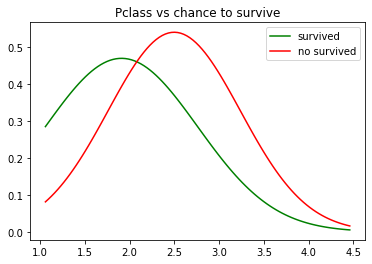

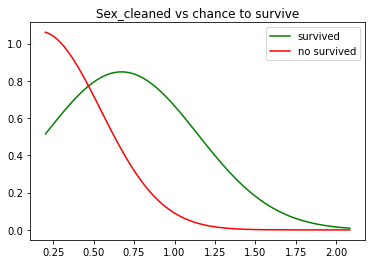

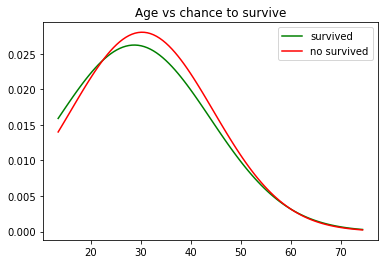

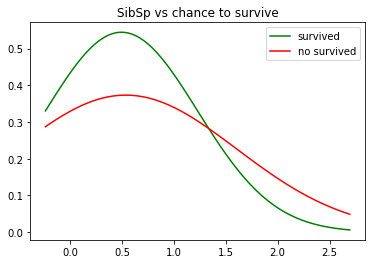

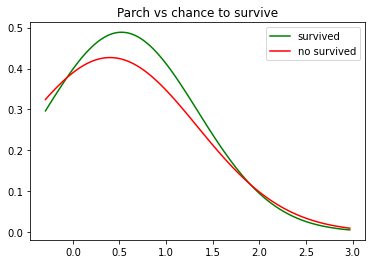

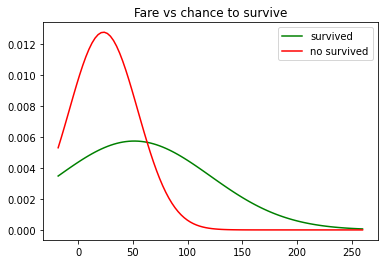

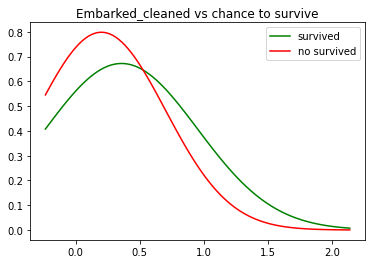

In [33]:
for i in used_features:
    function(i)